# Implicit Aspect Extraction & Identification  

# 1. Importing Libraries and defining functions

In [166]:
import json
import glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import xml.etree.ElementTree as ET, getopt, logging, sys, random, re, copy, os
from lxml import etree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras import backend as K

import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


from sklearn.feature_extraction.text import TfidfVectorizer


import pickle
import scipy

In [4]:
path = r'C:\Users\Vaibhav\Documents\Practicum\DepTag\DepTag\AirlineRatings'
path2=r"C:\Users\Vaibhav\Documents\Practicum\DepTag\DepTag\TripAdvisor"


files = glob.glob(path+r'/*.json')
files2= glob.glob(path2+r'/*.json')
#Load File
finInfo = []
for i in range(len(files)):
  for line in open(files[i], encoding='utf-8'):
    info = json.loads(line)
  finInfo.append(info)
 
    
for i in range(len(files2)):
  for line in open(files2[i], encoding='utf-8'):
    info = json.loads(line)
  finInfo.append(info)

In [5]:
len(finInfo)

21

In [6]:

#StopWords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't"]
stop_words = stop_words+newStop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

#Get Corpus
labels = []
for i in range(len(finInfo)):
    info = finInfo[i]
    for j in range(len(info)):
        if (info[j]['Details'] != []):
            lbls = info[j]['Labels']
            for k in range(len(lbls)):
                for p,q in lbls[k].items():
                    for l in range(len(q)):
                        labels.append(q[l])
finLabels = []
for i in range(len(labels)):
    new = labels[i].split()
    for j in range(len(new)):
        if new[j] not in stop_words:
            finLabels.append(new[j])

corpus = list(set(finLabels))


In [8]:
len(corpus)

3091

In [9]:

#Change Bookings to Off-flight
for i in range(len(finInfo)):
    info = finInfo[i]
    for j in range(len(info)):
        det = info[j]['Details']
        for k in range(len(det)):
            if (det[k][-1]) == 'b':
                det[k][-1] = 'o'

In [99]:
#Get ID and Details
details = []
for i in range(len(finInfo)):
    info = finInfo[i]
    for j in range(len(info)):
        dic = {}
        ids = info[j]['id']
        sent = info[j]['sentence']
        newSent = ' '.join(sent)
        dic['sentences'] = sent
        sentTkn = newSent.split()
        det = info[j]['Details']
        nli = []
        for k in range(len(det)):
            li = []
            for l in range(len(sentTkn)):
                if (det[k][0] == 1):  
                    word = det[k][2][0]
                    if word in corpus and word not in stop_words:
                        if word == sentTkn[l]:
                            if (l == 0):
                                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], '', sentTkn[l+1], det[k][4], ids)
                            elif (l == len(sentTkn)-1):
                                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], '', det[k][4], ids)
                            else:
                                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], sentTkn[l+1], det[k][4], ids)
                else:
                    word = det[k][1][0]
                    if word in corpus and word not in stop_words:
                        if word == sentTkn[l]:
                            if (l == 0):
                                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], '', sentTkn[l+1], det[k][4], ids)
                            elif (l == len(sentTkn)-1):
                                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], '', det[k][4], ids)
                            else:
                                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], sentTkn[l+1], det[k][4], ids)
            li.append(a)
            li = list(set(li))
            nli.append(li)
        dic['details'] = nli
        details.append(dic)

In [100]:
data = []
for i in range(len(details)):
    if details[i]['details'] != []:
        det = details[i]['details']
        for d in det:
            for combos in d:
                data.append(combos)

data = list(set(data))
            
print(len(data))

23208


In [101]:
data

[('choice', 'NN', 0.0, 'champagne', 'NN', 'good', 'of', 'f', 3426),
 ('cost', 'VBD', 0.0, 'ticket', 'NN', 'now', 'me', 'o', 3178),
 ('space',
  'NN',
  'comfortable',
  'JJ',
  0.0,
  'conj:and',
  'enough',
  'between',
  's',
  28),
 ('lounge', 'NN', 'food', 'NN', 0.0, 'nsubj', 'flagship', 'at', 'o', 3688),
 ('crew', 'NN', 0.0, 'on', 'IN', 'helpful', 'nothing', 'o', 2324),
 ('better', 'JJR', 0.44, 'seats', 'NNS', 'were', 'considering', 's', 3804),
 ('good', 'JJ', 0.44, 'was', 'VBD', 'very', 'and', 'i', 1566),
 ('food', 'NN', 0.0, 'of', 'IN', 'of', 'and', 'f', 879),
 ('staff',
  'NN',
  'commended',
  'VBN',
  0.0,
  'nsubj:pass',
  'flight',
  'really',
  'st',
  3360),
 ('half', 'NN', 0.0, 'plane', 'NN', 'back', 'of', 'c', 1600),
 ('ads', 'NNS', 0.0, 'of', 'IN', 'of', 'before', 'e', 3389),
 ('food', 'NN', 'expensive', 'JJ', 0.0, 'nsubj', 'time', 'was', 'f', 2952),
 ('fees', 'NNS', 0.0, 'baggage', 'NN', 'baggage', 'because', 'o', 3461),
 ('refundable', 'JJ', 'said', 'VBD', 0.0, 'ccom

In [20]:
#ids: [(MAIN-WORD, MAIN-WORD-POS-TAG, DEPENDENT-WORD, DEPENDENT-WORD-POS-TAG,
##MAIN-WORD-SENTIMENT-SCORE, DEPENDENCY-TAG, PREVIOUS WORD, NEXTWORD, ENTITY-LABEL, ID)]

columns=['main','main_pos','dep','dep_pos','main_sent','dep_tag','prev','next','entity','id']
df_entity=pd.DataFrame(data)
df_entity.columns=columns

In [21]:
df_entity.head(6)

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id
0,choice,NN,0,champagne,NN,good,of,f,3426,NaN
1,cost,VBD,0,ticket,NN,now,me,o,3178,NaN
2,space,NN,comfortable,JJ,0,conj:and,enough,between,s,28.0
3,lounge,NN,food,NN,0,nsubj,flagship,at,o,3688.0
4,crew,NN,0,on,IN,helpful,nothing,o,2324,NaN
5,better,JJR,0.44,seats,NNS,were,considering,s,3804,NaN


# 2. Importing Data

In [22]:
all_files=glob.glob(r"C:\Users\Vaibhav\Downloads\filesvo\newfilesvokv\*.csv") 

pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Aspect,Unnamed: 0,id,id_updated,word
0,NaN,0.0,1,100001.0,NaN
1,NaN,0.0,2,100002.0,NaN
2,NaN,1.0,2,100002.0,NaN
3,NaN,0.0,3,100003.0,NaN
4,NaN,1.0,3,100003.0,NaN
5,NaN,2.0,3,100003.0,NaN
6,NaN,0.0,4,100004.0,NaN
7,NaN,1.0,4,100004.0,NaN
8,NaN,0.0,5,100005.0,NaN
9,NaN,1.0,5,100005.0,NaN


In [23]:
all_files

['C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Cabin1.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\CabinAspects.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Entertainment1.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\EntertainmentAspects.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Food1_updated.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\FoodAspects.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\In-flight service1.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\InflightAspects.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Off-flight service1.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Off-flight service1_ticketing.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\OffFlightAspects.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Possession1.csv',
 'C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Poss

In [24]:
#id word Aspect

In [125]:
df_list=[]

In [126]:
#cabin

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Cabin1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'cabin_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/CabinAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'cabin_' + df3['Aspect'].astype(str)

df_cabin=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_cabin)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [127]:
#entertainment

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Entertainment1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'entertainment_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/EntertainmentAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'entertainment_' + df3['Aspect'].astype(str)

df_entertainment=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_entertainment)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [128]:
#food

df0=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/Food1_updated.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'food_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/FoodAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'food_' + df3['Aspect'].astype(str)

df_food=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_food)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [129]:
#inflight

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\In-flight service1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'inflight_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/InflightAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'inflight_' + df3['Aspect'].astype(str)

df_inflight=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_inflight)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [130]:
#offflight

df0=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/Off-flight service1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'offflight_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/OffFlightAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'offflight_' + df3['Aspect'].astype(str)

df4=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/Off-flight service1_ticketing.csv")
df5=df4[df4['Aspect'].notna()]
df5=df5[df5['word'].notna()]
df5['Aspect'] = 'offflight_' + df5['Aspect'].astype(str)

df_offflight=pd.concat([df1,df3,df5], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_offflight)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [131]:
#possession

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Possession1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'possession_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/PossessionAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'possession_' + df3['Aspect'].astype(str)

df_possession=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_possession)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [132]:
#seat

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Seat1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'seat_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/SeatAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'seat_' + df3['Aspect'].astype(str)

df_seat=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_seat)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [133]:
#staff

df0=pd.read_csv(r"C:\\Users\\Vaibhav\\Downloads\\filesvo\\newfilesvokv\\Staff1.csv")
df1=df0[df0['Aspect'].notna()]
df1=df1[df1['word'].notna()]
df1['Aspect'] = 'staff_' + df1['Aspect'].astype(str)

df2=pd.read_csv(r"C://Users//Vaibhav//Downloads//filesvo//newfilesvokv/StaffAspects.csv")
df3=df2[df2['Aspect'].notna()]
df3=df3[df3['word'].notna()]
df3['Aspect'] = 'staff_' + df3['Aspect'].astype(str)

df_staff=pd.concat([df1,df3], ignore_index=True)[['id','id_updated','word','Aspect']]
df_list.append(df_staff)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [134]:
len(df_list)

8

In [35]:
df_aspect=pd.concat(df_list, ignore_index=True)

In [36]:
df_aspect

,id,id_updated,word,Aspect
0,6,100006.0,spotless,cabin_condition
1,48,100048.0,spacious and comfortable,cabin_Size
2,75,100075.0,lots of legroom,cabin_Size
3,76,100076.0,ambience and quietness,cabin_condition
4,78,100078.0,older fit-out,cabin_condition
5,78,100078.0,really outdated,cabin_condition
6,79,100079.0,unable to open,cabin_condition
7,82,100082.0,really old,cabin_condition
8,89,100089.0,plenty of storage,cabin_Size
9,100,100100.0,quietness,cabin_condition


In [37]:
df_entity

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id
0,choice,NN,0,champagne,NN,good,of,f,3426,NaN
1,cost,VBD,0,ticket,NN,now,me,o,3178,NaN
2,space,NN,comfortable,JJ,0,conj:and,enough,between,s,28.0
3,lounge,NN,food,NN,0,nsubj,flagship,at,o,3688.0
4,crew,NN,0,on,IN,helpful,nothing,o,2324,NaN
5,better,JJR,0.44,seats,NNS,were,considering,s,3804,NaN
6,good,JJ,0.44,was,VBD,very,and,i,1566,NaN
7,food,NN,0,of,IN,of,and,f,879,NaN
8,staff,NN,commended,VBN,0,nsubj:pass,flight,really,st,3360.0
9,half,NN,0,plane,NN,back,of,c,1600,NaN


In [38]:
df_data=pd.merge(df_entity, df_aspect, how='inner', left_on=['id','main'], right_on=['id','word'],
         left_index=False, right_index=False, sort=True)
         #suffixes=('_x', '_y'), copy=True, indicator=False,
         #validate=None)

In [39]:
df_data

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id,id_updated,word,Aspect
0,luggage,NN,weighed,VBD,0,obj,hand,again,p,2.0,100002.0,luggage,possession_general
1,spoil,VB,enough,JJ,0,xcomp,to,a,o,2.0,100002.0,spoil,offflight_general
2,weighed,VBD,free,JJ,0,dep,already,from,p,2.0,100002.0,weighed,possession_handling
3,safely,RB,got,VBD,0.49,advmod,home,and,i,4.0,100004.0,safely,inflight_operations
4,hospitality,NN,interiors,NNS,0,conj:and,and,strangely,st,5.0,200005.0,hospitality,staff_behaviour
5,late,JJ,fly,VB,0,advcl:though,typically,by,o,5.0,200005.0,late,offflight_general
6,crew,NN,look,NN,0,compound,the,look,st,6.0,100006.0,crew,staff_general
7,professional,JJ,cabin,NN,0,amod,and,cabin,st,6.0,100006.0,professional,staff_behaviour
8,service,NN,incredible,JJ,0,nsubj,the,is,i,6.0,100006.0,service,inflight_operations
9,service,NN,desk,NN,0,compound,the,is,o,6.0,100006.0,service,inflight_operations


In [40]:
df_food.sample()

,id,id_updated,word,Aspect
497,3171,NaN,without any water,food_service


In [41]:
df_food[['id','id_updated','word','Aspect']]

,id,id_updated,word,Aspect
0,3,100003.0,meals,food_Service
1,4,100004.0,terrible,food_Taste
2,8,100008.0,water,food_Service
3,8,100008.0,no offer,food_Service
4,10,100010.0,salad was rotting,food_Taste
5,10,100010.0,entrée was still frozen,food_Temperature
6,23,100023.0,ran out of lunch options,food_Service
7,23,100023.0,tea or coffee,food_Service
8,24,100024.0,meal overcooked,food_Taste
9,24,100024.0,food was average,food_Taste


# 4. Word to Sequence

In [42]:
#a. text to numerical

#C. separate for entities

#b. one hot encoding


In [ ]:
'''' 1. CountVectorizer
#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)''''

In [45]:
import json
vlst_txt=[]
vlst_lbl=[]

In [46]:
file = r'C:\Users\Vaibhav\Documents\Practicum\AspectClass\emirates.json1'
info = []
for line in open(file, encoding='utf-8'):
    info.append(json.loads(line))

In [47]:
countbr=0

for i in range(len(info)):
    if (len(info[i]['labels']))==0:
        countbr+=1
        continue
        
    if countbr==3:
        break
    
    vlst_txt.append(info[i]['text'])
    
    lblset=set()
    for j in range(len(info[i]['labels'])):
        lblset.add(info[i]['labels'][j][2])
    vlst_lbl.append(lblset)
    
    countbr=0

In [47]:
#1. Tokenizer  #goodtogo
'''tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(vlst_txt)
'''

In [48]:
#1. Tokenizer #goodtogo
'''#main dep prev next
# Text to sequence

df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )'''

In [48]:
vlst_txt

['i was travelling from heathrow to dhaka via dubai the flight from heathrow to dubai was awesome when i was boarding from dubai they weighed my hand luggage again and asked to pay for my duty-free shopping which is four kilos i said this is my sweater and chocolate which i bought duty-free they said we can consider one rest you have to pay for it otherwise you can return your duty-free shopping moreover you have only fifteen minutes on your hand if you can ’ t come back you will miss your flight i tried to explain i ’ m from london and always fly on emirates it ’ s only four kg extra which is duty-free i already weighed from london then they became so rude and gave me options pay for three kg or throw away your products i paid aes two hundred and forty which is around £50 their bad customer service is enough to spoil a holiday',
 "dubai to delhi i loved going on emirates with my family the food was good and so were the kid 's meals the kids got toys the entertainment was great the onl

In [49]:
#2 tfidf

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re

In [27]:
sentences = list()
with open(r"C:\\Users\\Vaibhav\\Downloads\\abc.txt") as file:
    for line in file:
        for l in re.split(r"\.\s|\?\s|\!\s|\n",line):
            if l:
                sentences.append(l)

In [50]:
cvec = CountVectorizer(stop_words='english')#, min_df=1, max_df=5, ngram_range=(1,2))
sf = cvec.fit_transform(sentences)

In [29]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

In [ ]:
dff=weights_df.sort_values(by='weight', ascending=False)

In [39]:
dff[dff['term']=='cabin']['weight'].loc[:]

180    0.034917
Name: weight, dtype: float64

In [ ]:
df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)

In [ ]:
#3. embedding

In [ ]:
pickle_obj = open(r"C:\Users\Vaibhav\Downloads/embedding.pickle", "rb") #location to your pickle file.
wvec = pickle.load(pickle_obj)
pickle_obj.close()

def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(wvec[word1], wvec[word2]))

lst1=[]
for i in zip(df['main'],df['dep']):
    lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
df_data['dep_d']=lst1


lst1=[]
for i in zip(df['main'],df['prev']):
    lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
df_data['prev_d']=lst1

lst1=[]
for i in zip(df['main'],df['next']):
    lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
df_data['next_d']=lst1



df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)


In [ ]:
#initial, written few cells below, dont run here, this is just for ref
#x_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)

In [ ]:
#new , for embedding, dont run here, this is just for ref, run after
#x_columns=x_columns+['dep_d'+'prev_d'+'next_d']

In [120]:
df=pd.DataFrame({'a':['as','the','ok'],'b':['yes','yes','yes']})

In [123]:

lst1=[]
for i in zip(df['a'],df['b']):
    lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
df['dep_d']=lst1

In [124]:

df

,a,b,dep_d
0,as,yes,0.565921
1,the,yes,0.762907
2,ok,yes,0.799263


In [49]:
#main_pos  dep_pos dep_tag
#One hot encoding 

df_main_pos=pd.get_dummies(df_data['main_pos'],prefix='main_pos')
df_dep_pos=pd.get_dummies(df_data['dep_pos'],prefix='dep_pos')
df_dep_tag=pd.get_dummies(df_data['dep_tag'],prefix='dep_tag')

In [81]:
len(list(df_dep_tag.columns))

116

In [82]:
len(df_dep_pos.columns)

22

In [84]:
len(df_main_pos.columns)

21

In [86]:
len(x_columns)

164

In [87]:
x_columns

['main_s',
 'dep_s',
 'prev_s',
 'next_s',
 'main_sent',
 'main_pos_AFX',
 'main_pos_CD',
 'main_pos_DT',
 'main_pos_IN',
 'main_pos_JJ',
 'main_pos_JJR',
 'main_pos_JJS',
 'main_pos_MD',
 'main_pos_NN',
 'main_pos_NNP',
 'main_pos_NNS',
 'main_pos_PDT',
 'main_pos_RB',
 'main_pos_RBR',
 'main_pos_RP',
 'main_pos_VB',
 'main_pos_VBD',
 'main_pos_VBG',
 'main_pos_VBN',
 'main_pos_VBP',
 'main_pos_VBZ',
 'dep_pos_CC',
 'dep_pos_CD',
 'dep_pos_DT',
 'dep_pos_FW',
 'dep_pos_IN',
 'dep_pos_JJ',
 'dep_pos_JJR',
 'dep_pos_JJS',
 'dep_pos_MD',
 'dep_pos_NN',
 'dep_pos_NNP',
 'dep_pos_NNS',
 'dep_pos_PRP',
 'dep_pos_RB',
 'dep_pos_RBR',
 'dep_pos_VB',
 'dep_pos_VBD',
 'dep_pos_VBG',
 'dep_pos_VBN',
 'dep_pos_VBP',
 'dep_pos_VBZ',
 'dep_pos_WDT',
 'dep_tag_acl',
 'dep_tag_acl:after',
 'dep_tag_acl:as',
 'dep_tag_acl:at',
 'dep_tag_acl:between',
 'dep_tag_acl:for',
 'dep_tag_acl:from',
 'dep_tag_acl:including',
 'dep_tag_acl:of',
 'dep_tag_acl:on',
 'dep_tag_acl:relcl',
 'dep_tag_acl:to',
 'dep_t

In [50]:
df_data2=pd.concat([df_data,df_main_pos,df_dep_pos,df_dep_tag], axis=1)

new_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)+['Aspect']
df_data3=df_data2[new_columns]

In [158]:
df_data3['Aspect']=df_data3['Aspect'].str.lower()

In [156]:
#df_data3['Aspect']=df_data3.loc[:,'Aspect'].str.lower()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
df_data_food=df_data3[df_data3['Aspect'].str.contains("food")]
df_data_entertainment=df_data3[df_data3['Aspect'].str.contains("entertainment")]
df_data_cabin=df_data3[df_data3['Aspect'].str.contains("cabin")]
df_data_inflight=df_data3[df_data3['Aspect'].str.contains("inflight")]
df_data_offflight=df_data3[df_data3['Aspect'].str.contains("offflight")]
df_data_possession=df_data3[df_data3['Aspect'].str.contains("possession")]
df_data_seat=df_data3[df_data3['Aspect'].str.contains("seat")]
df_data_staff=df_data3[df_data3['Aspect'].str.contains("staff")]

In [52]:
#all_probs=pd.DataFrame(model.predict_proba(X_test),columns=model.classes_)

In [53]:
from sklearn.ensemble import RandomForestClassifier

def getPredictions(x_train, x_test, y_train):#, test):
    #model = RandomForestClassifier(n_estimators=150)
    #model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return predictions

In [54]:
x_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)

In [ ]:
#when embedding:
# run here
#x_columns=x_columns+['dep_d'+'prev_d'+'next_d']

In [55]:
#Method 1.
#Food
msk=(np.random.rand(len(df_data_food)) < 0.8)
train=df_data_food[msk]
test=df_data_food[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"food ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_temperature', 'food_taste',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_taste', 'food_taste', 'food_service',
       'food_service', 'food_taste', 'food_service'], dtype=object)

In [56]:
y_test

71          food_service
144         food_service
596           food_taste
749           food_taste
1432        food_service
1514        food_service
1567        food_service
1575        food_service
1626        food_service
1753        food_service
2053        food_service
2102        food_service
2343        food_service
2412        food_service
2479    food_temperature
2640          food_taste
2801        food_service
2904        food_service
2939        food_service
2987        food_service
2989        food_service
3112        food_service
3124        food_service
3145        food_service
3147        food_service
3231        food_service
3483        food_service
3510        food_service
3511        food_service
4147          food_taste
4148          food_taste
4353        food_service
4354        food_service
4370    food_temperature
4411        food_service
Name: Aspect, dtype: object

In [57]:
#Alternate method: This method one hot encodes the y labels and gives the result in arrays.
'''#Food
food_y=pd.get_dummies(df_data_food['Aspect'])

msk=(np.random.rand(len(food_y)) < 0.8)
train=df_data_food[msk]
test=df_data_food[~msk]

x_train=train[x_columns]
x_test=test[x_columns]
y_train=food_y[msk]
y_test=food_y[~msk]

getPredictions(x_train, x_test, y_train)'''

"#Food\nfood_y=pd.get_dummies(df_data_food['Aspect'])\n\nmsk=(np.random.rand(len(food_y)) < 0.8)\ntrain=df_data_food[msk]\ntest=df_data_food[~msk]\n\nx_train=train[x_columns]\nx_test=test[x_columns]\ny_train=food_y[msk]\ny_test=food_y[~msk]\n\ngetPredictions(x_train, x_test, y_train)"

In [58]:
y_test

71          food_service
144         food_service
596           food_taste
749           food_taste
1432        food_service
1514        food_service
1567        food_service
1575        food_service
1626        food_service
1753        food_service
2053        food_service
2102        food_service
2343        food_service
2412        food_service
2479    food_temperature
2640          food_taste
2801        food_service
2904        food_service
2939        food_service
2987        food_service
2989        food_service
3112        food_service
3124        food_service
3145        food_service
3147        food_service
3231        food_service
3483        food_service
3510        food_service
3511        food_service
4147          food_taste
4148          food_taste
4353        food_service
4354        food_service
4370    food_temperature
4411        food_service
Name: Aspect, dtype: object

In [59]:
#For other entities, using method 1:

In [60]:
#entertainment
msk=(np.random.rand(len(df_data_entertainment)) < 0.6)
train=df_data_entertainment[msk]
test=df_data_entertainment[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"entertainment ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['entertainment_general', 'entertainment_general',
       'entertainment_general', 'entertainment_general',
       'entertainment_visual', 'entertainment_general',
       'entertainment_general', 'entertainment_visual',
       'entertainment_general', 'entertainment_general',
       'entertainment_general', 'entertainment_general',
       'entertainment_general', 'entertainment_general',
       'entertainment_general', 'entertainment_general'], dtype=object)

In [61]:
y_test

65       entertainment_visual
66        entertainment_audio
167     entertainment_general
185      entertainment_visual
211      entertainment_visual
1220    entertainment_general
1497      entertainment_audio
1819     entertainment_visual
2385    entertainment_general
2445    entertainment_general
2446    entertainment_general
2879    entertainment_general
2905     entertainment_visual
3163    entertainment_general
3268    entertainment_general
3680     entertainment_visual
Name: Aspect, dtype: object

In [62]:
#staff
msk=(np.random.rand(len(df_data_staff)) < 0.8)
train=df_data_staff[msk]
test=df_data_staff[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"staff ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['staff_general', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_general', 'staff_general',
       'staff_general', 'staff_behaviour', 'staff_general',
       'staff_general', 'staff_general', 'staff_general', 'staff_general',
       'staff_general', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_general', 'staff_behaviour',
       'staff_general', 'staff_general', 'staff_behaviour',
       'staff_general', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_behaviour', 'staff_behaviour',
       'staff_behaviour', 'staff_behaviour', 'staff_behaviour',
       'staff_general', 'staff_general', 'staff_behaviour',
       'staff_general', 'staff_general', 'staff_general', 'staff_general',
       'staff_general', 'staff_general', '

In [63]:
#seat
msk=(np.random.rand(len(df_data_seat)) < 0.8)
train=df_data_seat[msk]
test=df_data_seat[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"seat ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['seat_comfort', 'seat_comfort', 'seat_operations', 'seat_comfort',
       'seat_operations', 'seat_operations', 'seat_comfort',
       'seat_comfort', 'seat_space', 'seat_operations', 'seat_comfort',
       'seat_operations', 'seat_comfort', 'seat_operations',
       'seat_comfort', 'seat_comfort', 'seat_comfort', 'seat_space',
       'seat_comfort', 'seat_comfort'], dtype=object)

In [64]:
#inflight
msk=(np.random.rand(len(df_data_inflight)) < 0.8)
train=df_data_inflight[msk]
test=df_data_inflight[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"inflight ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_facility', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operations', 'inflight_operations',
       'inflight_operatio

In [65]:
#offflight
msk=(np.random.rand(len(df_data_offflight)) < 0.8)
train=df_data_offflight[msk]
test=df_data_offflight[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"offflight ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['offflight_operations', 'offflight_operations',
       'offflight_ticketing', 'offflight_operations',
       'offflight_ticketing', 'offflight_operations',
       'offflight_ticketing', 'offflight_general', 'offflight_ticketing',
       'offflight_ticketing', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_facility', 'offflight_operations',
       'offflight_facility', 'offflight_ticketing', 'offflight_facility',
       'offflight_facility', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_operations', 'offflight_facility',
       'offflight_general', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_facility', 'offflight_facility',
       'offflight_facility', 'offflight_general', 'offflight_general',
       'offflight_general', 'o

In [66]:
#possession
msk=(np.random.rand(len(df_data_possession)) < 0.8)
train=df_data_possession[msk]
test=df_data_possession[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"possession ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_handling', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_general', 'possession_general',
       'possession_general', 'possession_handling', 'possession_handling',
       'possession_general', 'possession_general

In [67]:
#cabin
msk=(np.random.rand(len(df_data_cabin)) < 0.6)
train=df_data_cabin[msk]
test=df_data_cabin[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']


model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)
with open(r"cabin ", 'wb') as f:
    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)

array(['cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_fragrance', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition'], dtype=object)

# 5. Results

In [68]:
#function to check accuracy:
def check_acc(pred,y_test):
    right=0
    for i in range(len(y_test)):
        if pred[i]==y_test.iloc[i]:
            right+=1
    return right/len(y_test)

In [69]:
check_acc(getPredictions(x_train, x_test, y_train),y_test)

0.84

In [70]:
vlst_txt

['i was travelling from heathrow to dhaka via dubai the flight from heathrow to dubai was awesome when i was boarding from dubai they weighed my hand luggage again and asked to pay for my duty-free shopping which is four kilos i said this is my sweater and chocolate which i bought duty-free they said we can consider one rest you have to pay for it otherwise you can return your duty-free shopping moreover you have only fifteen minutes on your hand if you can ’ t come back you will miss your flight i tried to explain i ’ m from london and always fly on emirates it ’ s only four kg extra which is duty-free i already weighed from london then they became so rude and gave me options pay for three kg or throw away your products i paid aes two hundred and forty which is around £50 their bad customer service is enough to spoil a holiday',
 "dubai to delhi i loved going on emirates with my family the food was good and so were the kid 's meals the kids got toys the entertainment was great the onl

# 6. Multicollinearity

In [74]:
df_data3[x_columns].columns

Index(['main_s', 'dep_s', 'prev_s', 'next_s', 'main_sent', 'main_pos_AFX',
       'main_pos_CD', 'main_pos_DT', 'main_pos_IN', 'main_pos_JJ',
       ...
       'dep_tag_obl:through', 'dep_tag_obl:tmod', 'dep_tag_obl:to',
       'dep_tag_obl:upon', 'dep_tag_obl:via', 'dep_tag_obl:while',
       'dep_tag_obl:with', 'dep_tag_obl:without', 'dep_tag_parataxis',
       'dep_tag_xcomp'],
      dtype='object', length=164)

In [97]:
import rpy2        as com
#pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
infert = com.importr("ISLR")

# load the Auto dataset
#auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = df_data3.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

AttributeError: module 'rpy2' has no attribute 'importr'

In [92]:
!pip install rpy2 

  Stored in directory: C:\Users\Vaibhav\AppData\Local\pip\Cache\wheels\c1\70\d8\e042e66dc766f113f6e12a02f804f4c5222281295155c91aaf
Successfully built rpy2


In [96]:
from rpy2 import common

ImportError: cannot import name 'common' from 'rpy2' (C:\Users\Vaibhav\Anaconda3\lib\site-packages\rpy2\__init__.py)

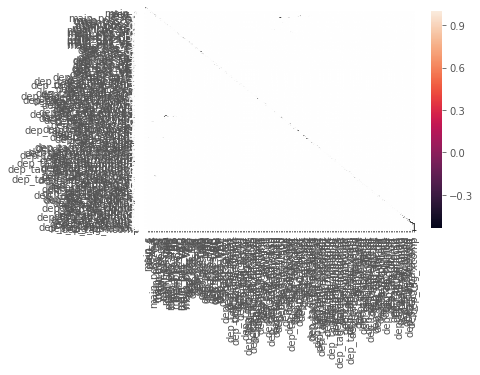

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

Var_Corr = df_data3[x_columns].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.show()

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df_temp = add_constant(df_data3[x_columns])
df_vif= pd.Series([variance_inflation_factor(df_temp.values, i) 
               for i in range(df_temp.shape[1])], 
              index=df_temp.columns)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [105]:
def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = OLS(x_i, x_noti).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif

In [111]:
import numpy as np
import scipy as sp

a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]

#ck = np.column_stack(df_data3[x_columns])
cc = sp.corrcoef(df_data3[x_columns], rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'float' object has no attribute 'shape'

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            #del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    #print(X.columns[variables])
    #return X.iloc[:, variables]

In [115]:
calculate_vif_(dff)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [121]:
# For each X, calculate VIF and save in dataframe
X=dff

vif = pd.DataFrame()
vif["VIF Factor"] = [np.array(variance_inflation_factor(X.values, i) for i in range(X.shape[1]),dtype=float)]
#covMat = np.array(covMat, dtype=float)
vif["features"] = X.columns

SyntaxError: Generator expression must be parenthesized (<ipython-input-121-13c58f938bf1>, line 5)

In [120]:
[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [125]:
np.array(variance_inflation_factor(X.values, i) for i in range(X.shape[1]),type=float)

SyntaxError: Generator expression must be parenthesized (<ipython-input-125-03d3c3757ffe>, line 1)

In [126]:
range(X.shape[1])

range(0, 164)

In [127]:
variance_inflation_factor(X.values, 2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [136]:
variance_inflation_factor(dff[['main_s','dep_s']], 2)

TypeError: '(slice(None, None, None), 2)' is an invalid key

In [138]:
dt = X.values
dt = dt.astype('float32')
train_size = int(len(dt) * 0.67)
train_dataset = dt[0:train_size,:]

In [137]:
X

,main_s,dep_s,prev_s,next_s,main_sent,main_pos_AFX,main_pos_CD,main_pos_DT,main_pos_IN,main_pos_JJ,...,dep_tag_obl:through,dep_tag_obl:tmod,dep_tag_obl:to,dep_tag_obl:upon,dep_tag_obl:via,dep_tag_obl:while,dep_tag_obl:with,dep_tag_obl:without,dep_tag_parataxis,dep_tag_xcomp
0,164,511,260,83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1216,318,2,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,511,157,373,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1219,158,263,3,0.49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,751,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,288,98,0,69,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,31,322,1,322,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,379,43,3,43,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,27,1244,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,27,518,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
dff[x_columns]

,main_s,dep_s,prev_s,next_s,main_sent,main_pos_AFX,main_pos_CD,main_pos_DT,main_pos_IN,main_pos_JJ,...,dep_tag_obl:through,dep_tag_obl:tmod,dep_tag_obl:to,dep_tag_obl:upon,dep_tag_obl:via,dep_tag_obl:while,dep_tag_obl:with,dep_tag_obl:without,dep_tag_parataxis,dep_tag_xcomp
0,164,511,260,83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1216,318,2,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,511,157,373,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1219,158,263,3,0.49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,751,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,288,98,0,69,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,31,322,1,322,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,379,43,3,43,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,27,1244,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,27,518,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df_data_food[x_columns]

,main_s,dep_s,prev_s,next_s,main_sent,main_pos_AFX,main_pos_CD,main_pos_DT,main_pos_IN,main_pos_JJ,...,dep_tag_obl:through,dep_tag_obl:tmod,dep_tag_obl:to,dep_tag_obl:upon,dep_tag_obl:via,dep_tag_obl:while,dep_tag_obl:with,dep_tag_obl:without,dep_tag_parataxis,dep_tag_xcomp
10,699,1113,6,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,244,291,68,292,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,762,130,5,404,0.32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,1033,232,3,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,1033,229,3,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,505,497,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,1810,1809,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,962,409,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,179,121,3,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,505,121,121,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7. SVM

In [ ]:
r'''import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(2)
# we create 40 linearly separable points
X = np.r_[np.random.randn(20, 2) — [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
# fit the model
clf = svm.SVC(kernel=’linear’, C=1)
clf.fit(X, Y)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx — (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy — np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()'''

In [181]:
#food

msk=(np.random.rand(len(df_data_food)) < 0.8)
train=df_data_food[msk]
test=df_data_food[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)




array(['food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_taste', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_taste', 'food_service',
       'food_service', 'food_service', 'food_temperature', 'food_service',
       'food_temperature', 'food_temperature', 'food_service',
       'food_taste', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_service', 'food_service', 'food_service',
       'food_service', 'food_temperature', 'food_service', 'food_taste'],
      dtype=object)

In [182]:
check_acc(getPredictions(x_train, x_test, y_train),y_test)

0.8285714285714286

In [183]:
#entertainment

msk=(np.random.rand(len(df_data_entertainment)) < 0.8)
train=df_data_entertainment[msk]
test=df_data_entertainment[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)


array(['entertainment_general', 'entertainment_visual',
       'entertainment_general', 'entertainment_visual',
       'entertainment_visual', 'entertainment_general',
       'entertainment_general'], dtype=object)

In [184]:
check_acc(getPredictions(x_train, x_test, y_train),y_test)

0.8571428571428571

In [185]:
#Cabin

msk=(np.random.rand(len(df_data_cabin)) < 0.8)
train=df_data_cabin[msk]
test=df_data_cabin[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)


array(['cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_fragrance', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition',
       'cabin_condition', 'cabin_condition', 'cabin_condition'],
      dtype=object)

In [186]:
check_acc(getPredictions(x_train, x_test, y_train),y_test)

0.8333333333333334

In [ ]:
# Staff
msk=(np.random.rand(len(df_data_staff)) < 0.8)
train=df_data_staff[msk]
test=df_data_staff[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)
check_acc(getPredictions(x_train, x_test, y_train),y_test)

In [ ]:
#seat

msk=(np.random.rand(len(df_data_seat)) < 0.8)
train=df_data_seat[msk]
test=df_data_seat[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)
check_acc(getPredictions(x_train, x_test, y_train),y_test)

In [ ]:
#offflight

msk=(np.random.rand(len(df_data_offflight)) < 0.8)
train=df_data_offflight[msk]
test=df_data_offflight[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)
check_acc(getPredictions(x_train, x_test, y_train),y_test)

In [ ]:
#inflight

msk=(np.random.rand(len(df_data_inflight)) < 0.8)
train=df_data_inflight[msk]
test=df_data_inflight[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)
check_acc(getPredictions(x_train, x_test, y_train),y_test)

In [ ]:
#possessions

msk=(np.random.rand(len(df_data_possessions)) < 0.8)
train=df_data_possessions[msk]
test=df_data_possessions[~msk]


x_train=train[x_columns]
x_test=test[x_columns]
y_train=train['Aspect']
y_test=test['Aspect']

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

#model = RandomForestClassifier(n_estimators=150)
#model.fit(x_train, y_train)

#with open(r"food ", 'wb') as f:
#    pickle.dump(model, f)


getPredictions(x_train, x_test, y_train)
check_acc(getPredictions(x_train, x_test, y_train),y_test)